In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
timecurves = pd.read_csv("C:\\Users\\u0117545\\Documents\\GitHub\\ULIFT_BC\\Purgatory\\EventDetectionTimecures.csv")
timecurves.head()

,Position Z,Diff Angular Vel Vec,Acc X
0,1.416108,-0.003895,-0.019913
1,1.414307,-0.003574,-0.043012
2,1.412569,-0.002968,-0.065459
3,1.410943,-0.001997,-0.086540
4,1.409464,-0.000696,-0.105798


In [12]:
POI = pd.read_csv("C:\\Users\\u0117545\\Documents\\GitHub\\ULIFT_BC\\Purgatory\\EventDetectionPOI.csv")
POI.head()

,subj_id,Trial,Start_phase1,Stop_phase1,Start_phase4,Stop_phase4,Var7,Change1,Change2
0,BC_005,ULIFT_R_002,53,393,1124,1454,NaN,0,0
1,NaN,NaN,57,399,1126,1445,0.0,451,1043


In [13]:
change = ("Step 1: determine the points where the "
          "average of the arm data has changed")

Start_end = ("Step 2: determin the start and end of "
            "the full ULIFT task with the rate of change "
            "of the angular velocity data")

Phases_segment = ("Step 3: determine the end of phase 1 "
                 "and the start of phase 4 with the local "
                 "minima in the acceleration data provided that "
                 "it falls before and after the change points respecively")

NameError: name 'df' is not defined

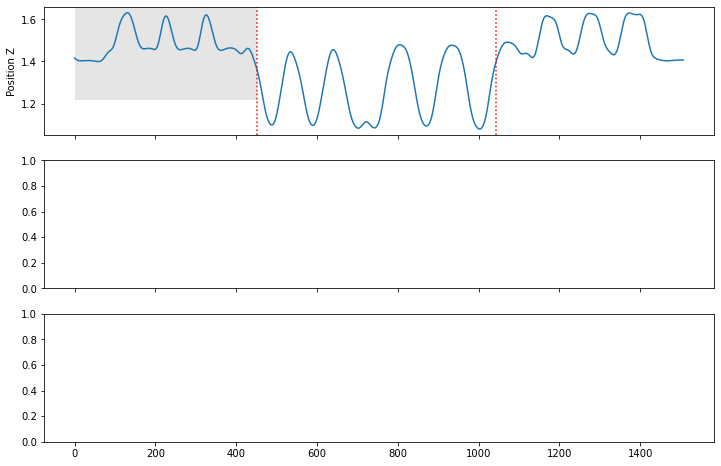

In [14]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(12,8), sharex=True)


sns.lineplot(x=timecurves.index, y='Position Z', data=timecurves, ax=ax[0])
ax[0].axvline(POI['Change1'][1], ls=':', color='red')
ax[0].axvline(POI['Change2'][1], ls=':', color='red', label='changepoints')
ax[0].hlines(y=1.5, xmin=0, xmax=POI['Change1'][1], linewidth=120, color='grey', alpha=0.2)
ax[0].hlines(y=1.5, xmin=POI['Change2'][1], xmax=len(df), linewidth=120, color='grey', alpha=0.2)
ax[0].text(0, 1.85, change)

sns.lineplot(x=timecurves.index, y='Diff Angular Vel Vec', data=timecurves, ax=ax[1])
ax[1].axvline(POI['Start_phase1'][1], ls=':', color='red')
ax[1].axvline(POI['Stop_phase4'][1], ls=':', color='red')
ax[1].hlines(y=0, xmin=POI['Start_phase1'][1], xmax=POI['Change1'][1], linewidth=120, color='grey', alpha=0.2)
ax[1].hlines(y=0, xmin=POI['Change2'][1], xmax=POI['Stop_phase4'][1], linewidth=120, color='grey', alpha=0.2)
ax[1].text(0, 0.85, Start_end, wrap=True)

sns.lineplot(x=timecurves.index, y='Acc X', data=timecurves, ax=ax[2])
ax[2].axvline(POI['Stop_phase1'][1], ls=':', color='red')
ax[2].axvline(POI['Start_phase4'][1], ls=':', color='red')
ax[2].hlines(y=0, xmin=POI['Start_phase1'][1], xmax=POI['Stop_phase1'][1], linewidth=120, color='green', alpha=0.2)
ax[2].hlines(y=0, xmin=POI['Start_phase4'][1], xmax=POI['Stop_phase4'][1], linewidth=120, color='green', alpha=0.2)
ax[2].text(0, 9, Phases_segment, ha='left', wrap=True)

plt.xlim(0,1400)
sns.despine()

plt.savefig('EventDetection.jpeg', dpi=300)